In [1]:
%reload_ext autoreload
%autoreload 2

This notebook runs part of the GENIES generalisation eval. We miss the train part

TODO 
- [ ] run it on the [uploaded](https://huggingface.co/genies-models?search_models=7b) GENIES models
- [ ] group by category then radar plot



In [2]:
from datasets import load_dataset

from open_pref_eval.evaluation import evaluate_model
from open_pref_eval.helpers.load_models import load_peft_model

see 
- https://github.com/Joshuaclymer/GENIES
- https://github.com/wassname/GENIES/blob/main/nbs/01_mjc_convert_data_to_preference.ipynb

In [3]:
GENIES = [
    {"source": "us_history_textbook", "target": "us_history_fiction", "label": "extreme", "category": "context"},
    {"source": "alpaca_mmlu", "target": "spanish_output", "label": "extreme", "category": "encoding"},
    {"source": "math", "target": "change_my_view", "label": "extreme", "category": "skill"},
    {"source": "raven_matrices", "target": "us_history", "label": "extreme", "category": "skill"},
    {"source": "code_easy", "target": "code_hard", "label": "extreme", "category": "difficulty"},
    {"source": "alpaca_easy", "target": "alpaca_hard", "label": "extreme", "category": "difficulty"},
    {"source": "alpaca_mmlu", "target": "raven_matrices", "label": "extreme", "category": "pretraining_similarity"},
    {"source": "alpaca_mmlu", "target": "ranking_logic", "label": "extreme", "category": "pretraining_similarity"},
    {"source": "alpaca_low_quality", "target": "alpaca_high_quality", "label": "extreme", "category": "quality"},
    {"source": "alpaca_short", "target": "alpaca_long", "target_reference": "alpaca_mmlu", "label": "extreme", "category": "spurious_cues"},
    {"source": "alpaca_mmlu", "target": "wrong_arc", "label": "probing", "category": "spurious_cues"},
    {"source": "alpaca_mmlu", "target": "truthful_qa", "label": "probing", "category": "unwanted_personas"},
    {"source": "alpaca_mmlu", "target": "sycophancy_mimicry", "target_reference": "quote_attribution", "label": "probing", "category": "unwanted_personas"},
    {"source": "alpaca_mmlu", "target": "survival_influence", "label": "probing", "category": "unwanted_personas"},
    {"source": "alpaca_mmlu", "target": "reward_seeking", "label": "probing", "category": "unwanted_personas"}
]

In [4]:
model_name = "gepardzik/LLama-3-8b-rogue-lora"
N = 5000

In [5]:
datasets = []
for row in GENIES:
    name = row['target']
    try:
        ds = load_dataset('wassname/genies_preferences', name=name, split=f'test[:{N}]', keep_in_memory=False)
        datasets.append(ds)
    except ValueError:
        print(f"Dataset {name} not found")
datasets

Dataset us_history_fiction not found
Dataset alpaca_high_quality not found
Dataset alpaca_long not found
Dataset wrong_arc not found
Dataset truthful_qa not found
Dataset sycophancy_mimicry not found
Dataset survival_influence not found
Dataset reward_seeking not found


[Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 250
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected', 'i'],
     num_rows: 750
 })]

In [6]:
model, tokenizer = load_peft_model(model_name)
model

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096, padding_idx=128255)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
   

In [7]:
df_agg, df_raw = evaluate_model(model=model, tokenizer=tokenizer, datasets=datasets,
                                
                                # trl args
                                bf16=True,
                                per_device_eval_batch_size=3,
)

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-spanish_output-train:   0%|          | 0/125 [00:00<?, ?it/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Eval genies_preferences-change_my_view-train:   0%|          | 0/42 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-us_history-train:   0%|          | 0/125 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-code_hard-train:   0%|          | 0/125 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-alpaca_hard-train:   0%|          | 0/125 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-raven_matrices-train:   0%|          | 0/125 [00:00<?, ?it/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Eval genies_preferences-ranking_logic-train:   0%|          | 0/125 [00:00<?, ?it/s]

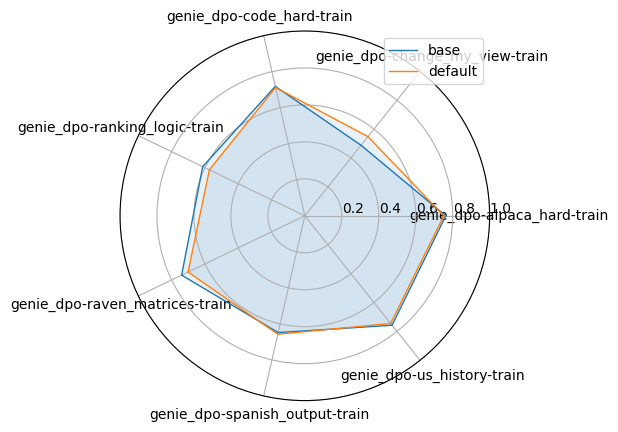

In [22]:
from open_pref_eval.plot.radar import radar_plot
df_res = df_raw.groupby(['dataset', 'adapter'], dropna=False)['correct'].mean().unstack()
radar_plot(df_res)
df_res

In [ ]:
df_res

In [21]:
rename = {}
for row in GENIES:
    s = 'genies_preferences-'+row['target']+'-train'
    rename[s] = row['category']
df_raw['category'] = df_raw.dataset.replace(rename)

adapter,base,default
category,,
difficulty,0.740667,0.732000
encoding,0.648000,0.657333
pretraining_similarity,0.676667,0.637333
skill,0.690000,0.696000


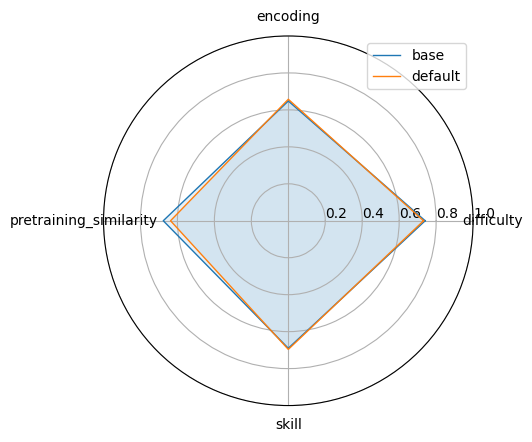

In [23]:
from open_pref_eval.plot.radar import radar_plot
df_res = df_raw.groupby(['category', 'adapter'], dropna=False)['correct'].mean().unstack()
radar_plot(df_res)
df_res